# EMA day of week EDA

## Data description

- 137 participants
- analysis based on available responses (no missingness imputation)
- EMAs were administered for 7 days beginning on Tuesdays (Tue to Mon), every three weeks of the study
- data spans week starting 2/11/20 to week ending 5/11/20, 5 weeks of EMAs
    - 2/11 to 2/17
    - 3/03 to 3/09
    - 3/24 to 3/30
    - 4/14 to 4/20
    - 5/05 to 5/11
- morning, afternoon, and evening EMAs

## EMA description

- Are you stressed?	
    - 0 (extremely stressed),1 (very stressed), 2 (stressed), 3 (a bit stressed), 4 (normal), 5 (a bit calm), 6 (calm), 7 (very calm), 8 (extremely calm)

- How is your mood?	
    - 0 (extremely poor), 1 (very poor), 2 (poor), 3 (a bit poor), 4 (neither), 5 (a bit good), 6 (good), 7 (very good), 8 (extremely good)
- How energetic are you?
    - 0 (extremely tired), 1 (very tired), 2 (tired), 3 (a bit tired), 4 (average), 5 (a bit energetic), 6 (energetic), 7 (very energetic), 8 (extremely energetic)
- How easily distracted are you right now?
    - 0 (extremely distracted), 1,  2 (very), 3,  4 (moderately), 5,  6 (a bit), 7, 8 (not all)

## Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import utils.df_utils as df_utils

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [93]:
#Code hider, source: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')


## Load data

In [17]:
ema_df = pd.read_pickle("data/ema.df")
emas = ['mood', 'stress', 'energetic', 'distracted']

# Day of week aggregation

In [73]:
day_abbrvs = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
ema_df['day_of_week'] = ema_df['date'].dt.dayofweek

ema_day_week = ema_df.groupby(['pid', 'day_of_week'], as_index=False)[emas].mean()
#ema_day_week_melt = pd.melt(ema_day_week, id_vars=['pid', 'day_of_week'], var_name="ema", value_name='mean_response')

## Summary stats

In [78]:
for i, ema in enumerate(emas):
    ema_pivot = ema_day_week.pivot(columns=['day_of_week'], values=ema)
    stats = ema_pivot.describe()
    stats.columns = day_abbrvs
    stats.index.name = ema
    display(stats)


,mon,tue,wed,thu,fri,sat,sun
mood,,,,,,,
count,135.000000,137.000000,137.000000,135.000000,135.000000,134.000000,134.000000
mean,4.371819,4.326572,4.346016,4.402078,4.448682,4.517960,4.518007
std,1.492607,1.411309,1.383648,1.364550,1.333905,1.410866,1.397925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.683333,3.545455,3.600000,3.732143,3.720779,3.843750,3.803571
50%,4.333333,4.444444,4.333333,4.307692,4.466667,4.500000,4.444444
75%,5.577778,5.400000,5.416667,5.380952,5.422619,5.537179,5.555556
max,7.400000,7.333333,7.000000,7.272727,7.428571,7.294118,7.000000


,mon,tue,wed,thu,fri,sat,sun
stress,,,,,,,
count,135.000000,137.000000,137.000000,135.000000,135.000000,134.000000,134.000000
mean,4.098071,3.918432,3.991470,4.034979,4.166332,4.311073,4.335384
std,1.430728,1.384785,1.337495,1.372739,1.336756,1.443940,1.416860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,3.090909,3.300000,3.291667,3.333333,3.609091,3.376894
50%,4.000000,3.916667,4.000000,4.000000,4.166667,4.133929,4.296703
75%,4.894444,4.714286,4.833333,4.916084,4.908730,5.230769,5.321429
max,7.400000,7.400000,7.500000,7.687500,8.000000,7.642857,7.529412


,mon,tue,wed,thu,fri,sat,sun
energetic,,,,,,,
count,135.000000,137.000000,137.000000,135.000000,135.000000,134.000000,134.000000
mean,3.526436,3.243331,3.325317,3.390148,3.452991,3.469172,3.486802
std,1.303858,1.235598,1.239815,1.235831,1.181516,1.263605,1.261760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.875000,2.400000,2.700000,2.708333,2.816667,2.742308,2.924451
50%,3.600000,3.400000,3.428571,3.333333,3.428571,3.585714,3.533333
75%,4.112500,3.833333,4.000000,4.105128,4.074176,4.070238,4.200000
max,7.250000,6.428571,6.750000,6.833333,6.555556,7.000000,6.800000


,mon,tue,wed,thu,fri,sat,sun
distracted,,,,,,,
count,135.000000,137.000000,137.000000,135.000000,135.000000,134.000000,134.000000
mean,3.944464,3.721864,3.828163,3.886341,3.946863,4.002515,4.024056
std,1.351806,1.229688,1.203814,1.220872,1.167783,1.222868,1.233008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.275000,3.000000,3.100000,3.320513,3.461538,3.400000,3.320055
50%,4.000000,3.857143,3.900000,3.923077,4.000000,4.000000,4.000000
75%,4.688889,4.363636,4.444444,4.374126,4.480769,4.572115,4.623106
max,7.500000,7.125000,7.625000,7.750000,8.000000,7.285714,7.000000


## Plots

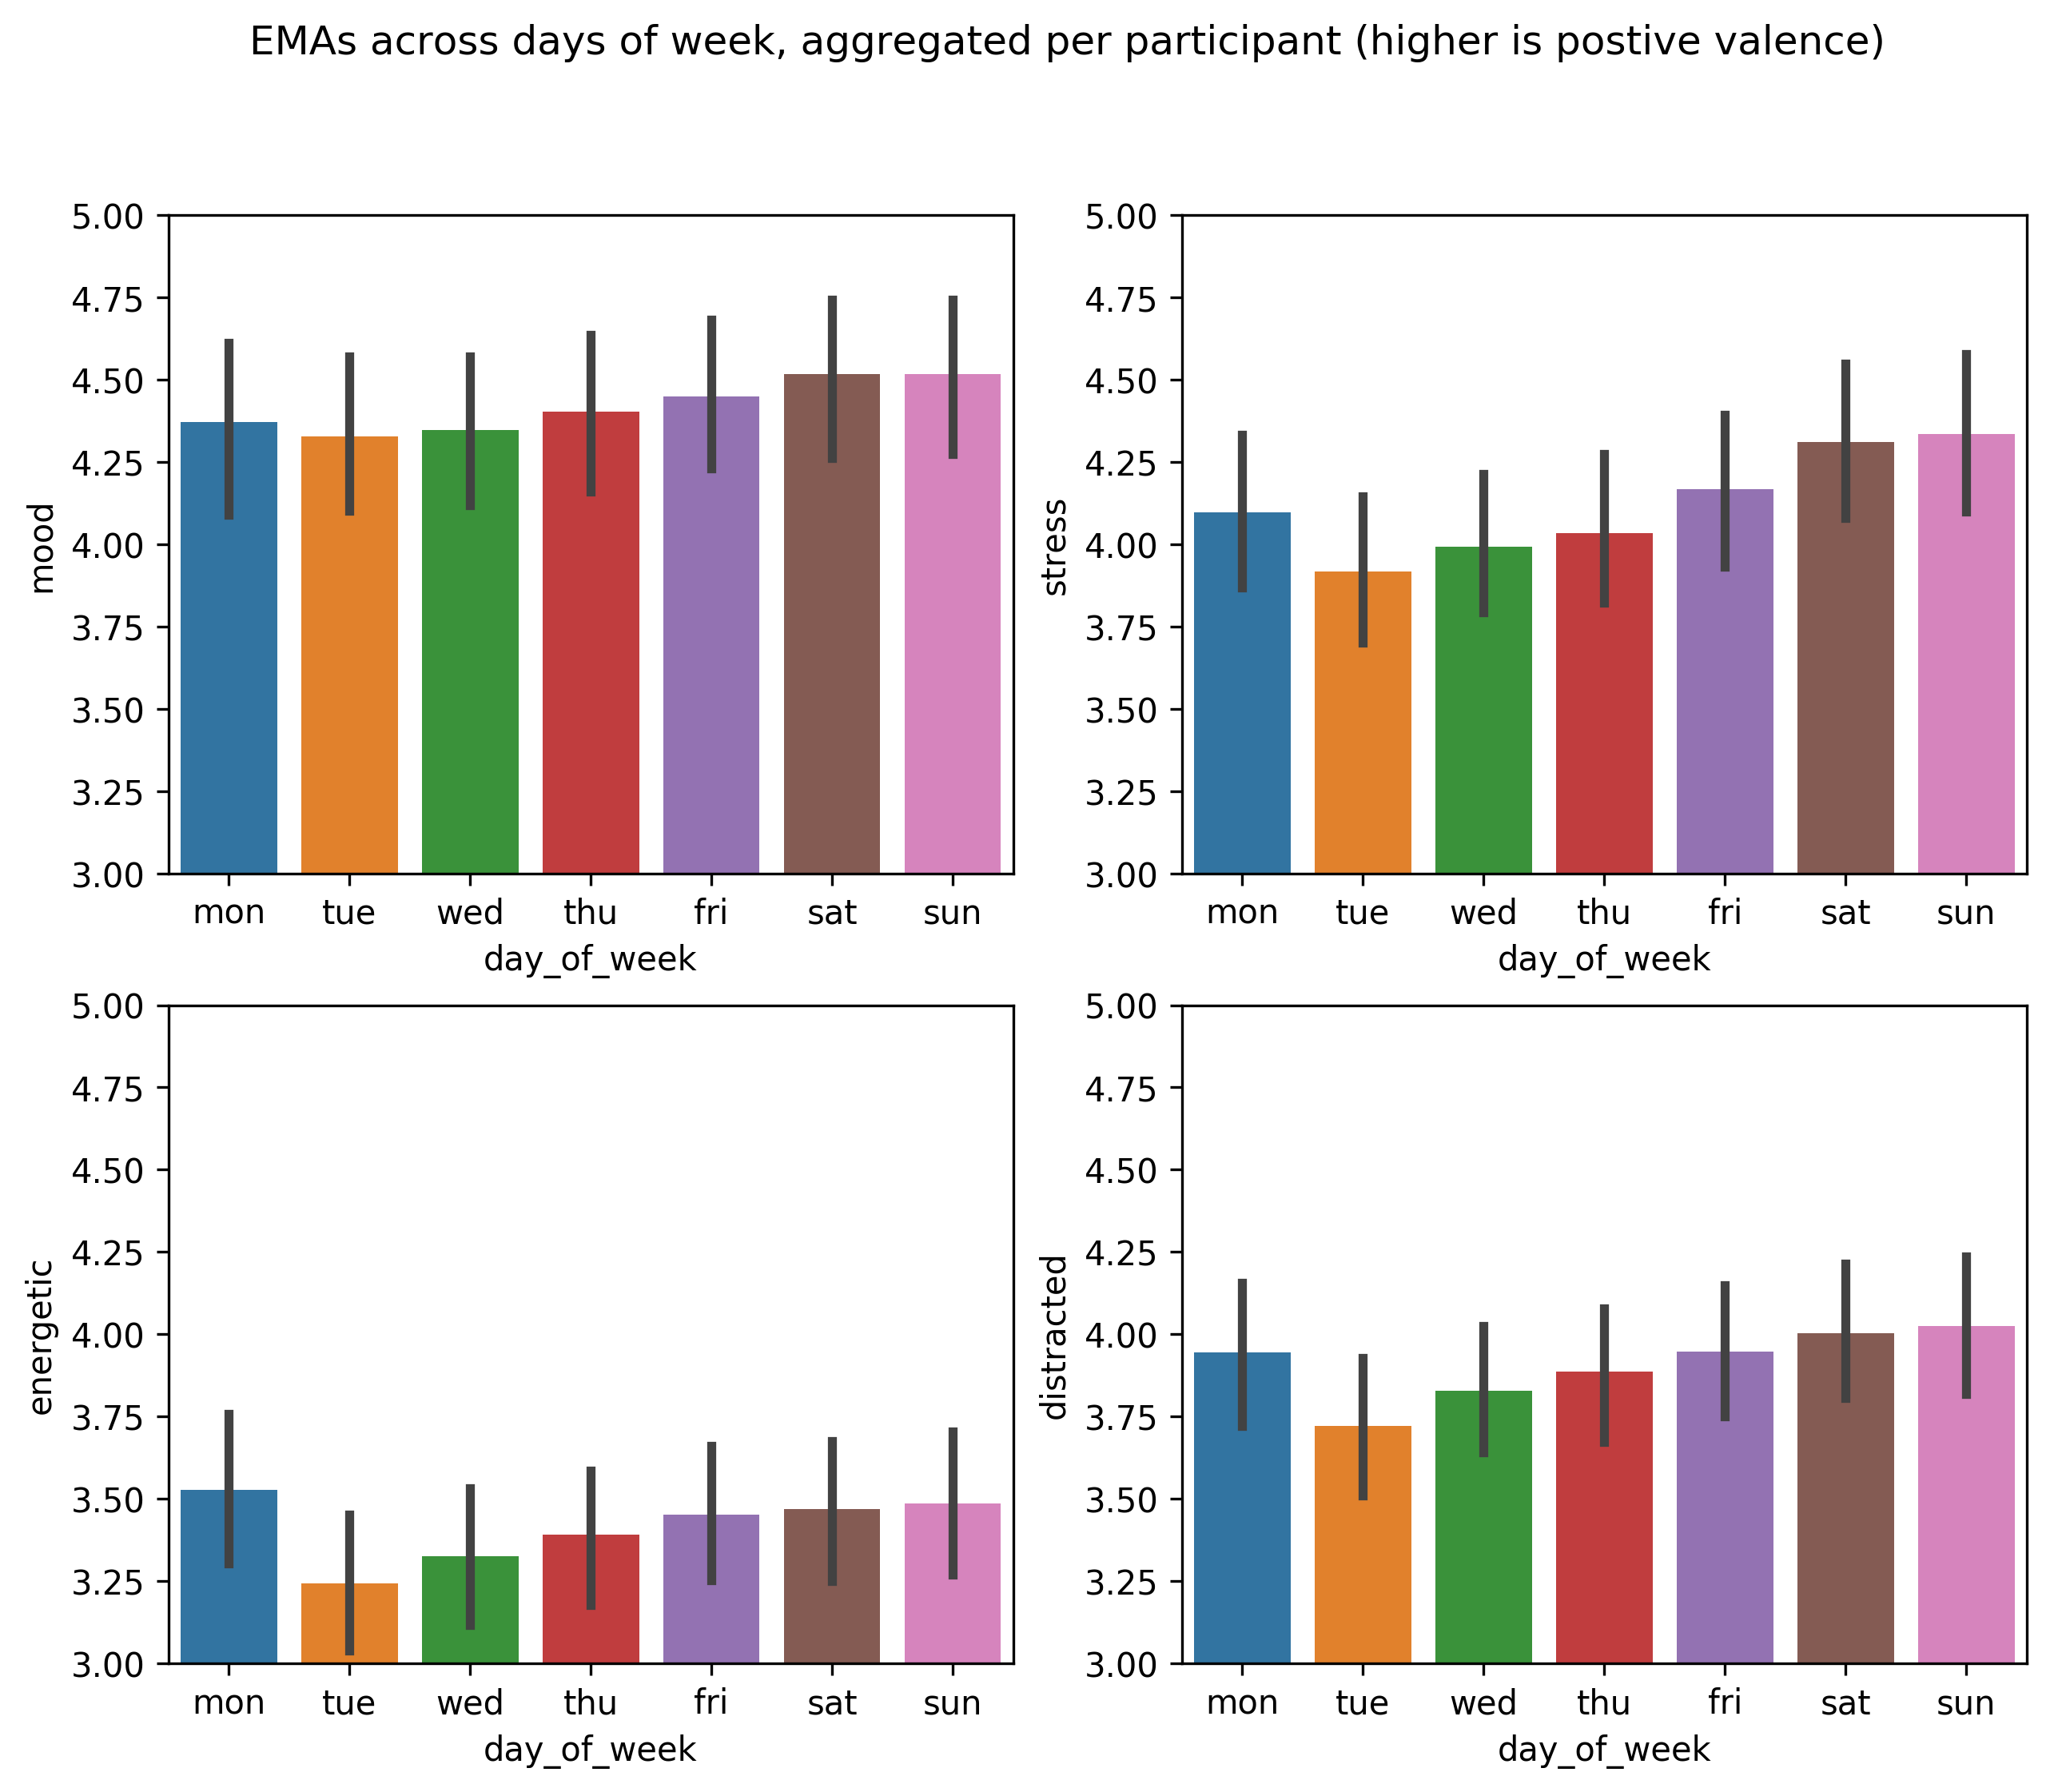

In [76]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.flatten()
for i, ema in enumerate(emas):
    cur_ax = axs[i]
    sns.barplot(x='day_of_week', y=ema, data=ema_day_week, ax=cur_ax)
    cur_ax.set_xticklabels(day_abbrvs)
    cur_ax.set_ylim(3,5)    
    
fig.suptitle("EMAs across days of week, aggregated per participant (higher is postive valence)");

# Time of day aggregation

In [82]:
ema_time_day = ema_df.groupby(['pid', 'generator-id'], as_index=False)[emas].mean()

## Summary stats

In [83]:
for i, ema in enumerate(emas):
    ema_pivot = ema_time_day.pivot(columns=['generator-id'], values=ema)
    stats = ema_pivot.describe()
    stats.index.name = ema
    display(stats)

generator-id,afternoon_ema,evening_ema,morning_ema
mood,,,
count,137.000000,137.000000,137.000000
mean,4.367224,4.446340,4.421479
std,1.345259,1.314543,1.304941
min,0.000000,0.000000,0.000000
25%,3.727273,3.760000,3.812500
50%,4.285714,4.400000,4.466667
75%,5.390244,5.500000,5.310345
max,7.037037,6.956522,7.000000


generator-id,afternoon_ema,evening_ema,morning_ema
stress,,,
count,137.000000,137.000000,137.000000
mean,4.031880,4.223039,4.170823
std,1.326550,1.391319,1.294670
min,0.000000,0.000000,0.000000
25%,3.312500,3.346154,3.517241
50%,3.972973,4.142857,4.083333
75%,4.888889,5.250000,4.851852
max,7.279070,7.720000,7.400000


generator-id,afternoon_ema,evening_ema,morning_ema
energetic,,,
count,137.000000,137.000000,137.000000
mean,3.517028,3.141791,3.453278
std,1.194631,1.213620,1.202078
min,0.000000,0.000000,0.000000
25%,2.837838,2.450000,2.800000
50%,3.666667,3.111111,3.454545
75%,4.205882,3.833333,4.137931
max,6.500000,6.375000,6.800000


generator-id,afternoon_ema,evening_ema,morning_ema
distracted,,,
count,137.000000,137.000000,137.000000
mean,3.887847,3.853453,3.958842
std,1.210258,1.168082,1.162385
min,0.000000,0.000000,0.000000
25%,3.285714,3.150000,3.400000
50%,3.918919,3.875000,3.965517
75%,4.483871,4.407407,4.517241
max,7.604651,7.240000,7.200000


## Plots

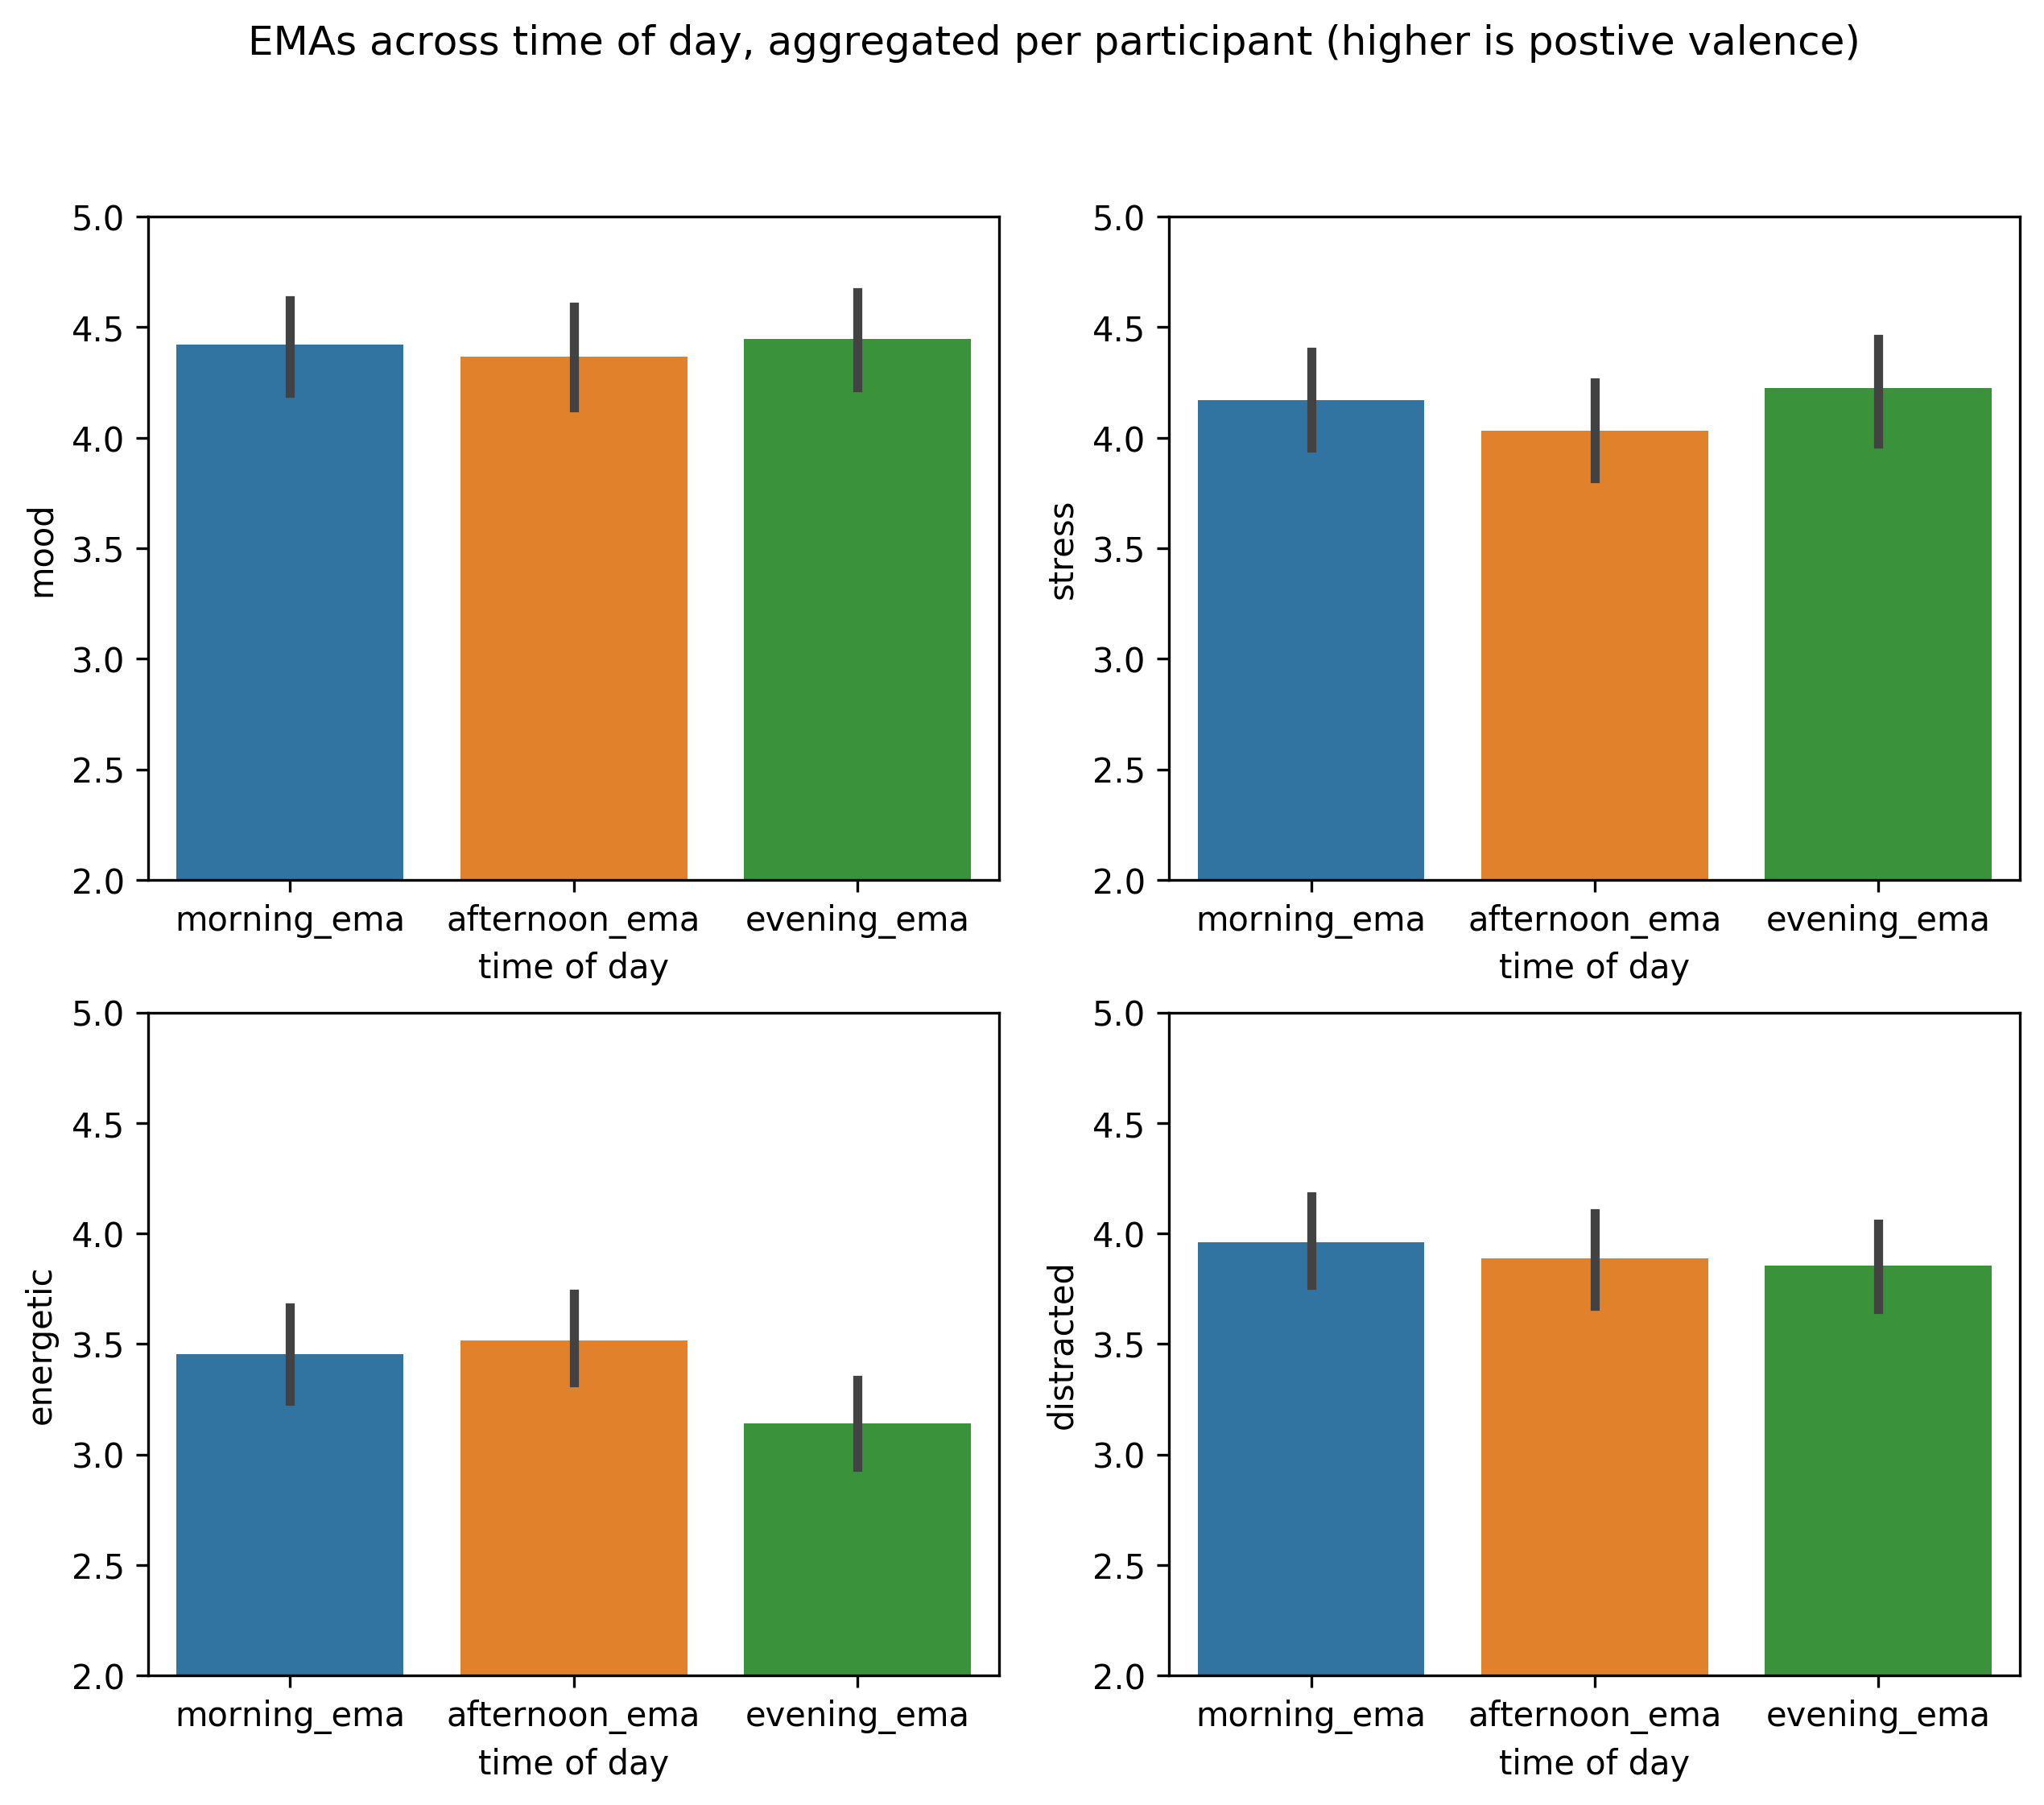

In [92]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.flatten()
for i, ema in enumerate(emas):
    cur_ax = axs[i]
    sns.barplot(x='generator-id', y=ema, data=ema_time_day, ax=cur_ax, order=['morning_ema', 'afternoon_ema', 'evening_ema'])
    cur_ax.set_xlabel("time of day")
    cur_ax.set_ylim(2,5)    
    
fig.suptitle("EMAs across time of day, aggregated per participant (higher is postive valence)");

In [89]:
ema_time_day_week = ema_df.groupby(['pid', 'day_of_week', 'generator-id'], as_index=False)[emas].mean()